## Linear regression with single var

Computing linear regression using gradient descent based on the single variable

Library imports and path calibration

In [1]:
import sys
import os
import json
import numpy as np
import importlib

module_path = os.path.abspath(os.path.join('..', 'jantools'))

if module_path not in sys.path:
    sys.path.append(module_path)

import linear_regression_singlevar as lnrgsv

#### Load training datasets

In [2]:
file_path = "../data/linear_regression_singlevar.json"

with open(file_path, "r") as f:
    data = json.load(f)

# Convert to NumPy arrays
x = np.array([item["x"] for item in data]).reshape(-1, 1)  # shape (n_samples, 1)
y = np.array([item["y"] for item in data])                  # shape (n_samples,)

#### Sci-kit learn

In [26]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


sgdr = SGDRegressor(max_iter=1, tol=None, warm_start=True, learning_rate="constant")

scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

sgdr_w = []

sgdr_costs = []
y_pred = []

for i in range(100):
    sgdr.fit(x_norm, y)
    y_pred = sgdr.predict(x_norm)

    sgdr_w.append(sgdr.coef_[0]/scaler.scale_)
    sgdr_costs.append(mean_squared_error(y, y_pred)*0.5)


#### janmltools

In [25]:
%%capture
file_path = "../data/linear_regression_singlevar.json"

w,b,stepsW,stepsB,computed_costs=lnrgsv.run_gradient_descent(x,y,0,0,0.0001,100)

#### Plotting obtained results

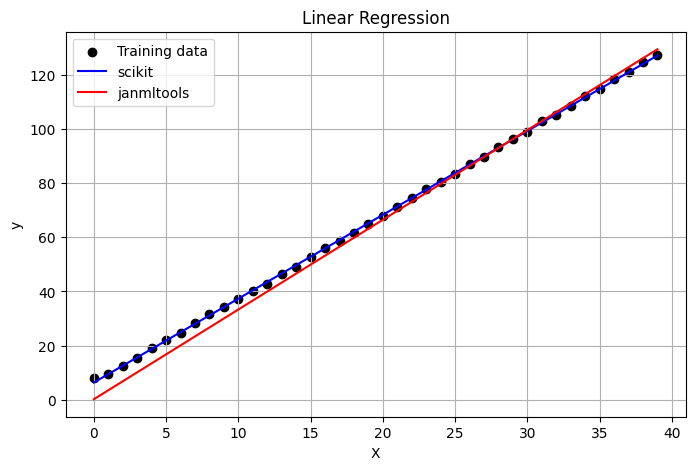

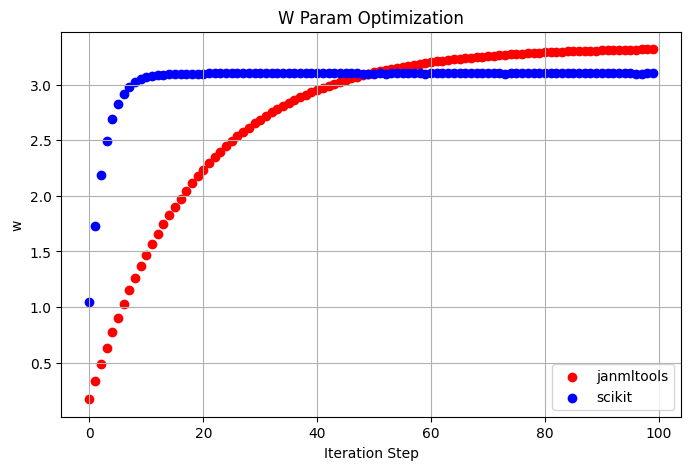

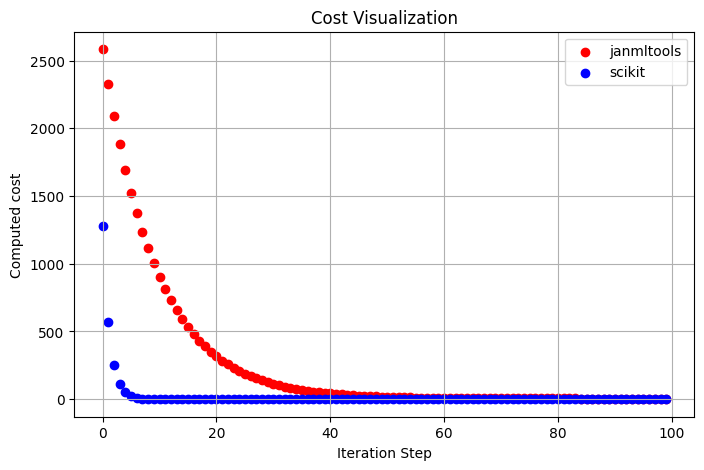

In [29]:
import matplotlib.pyplot as plt

# Regression results
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='black', label='Training data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.plot(x, sgdr.coef_ * x_norm + sgdr.intercept_, color='blue', label='scikit')
plt.plot(x, w*x+b,color='red',label='janmltools')
plt.legend()
plt.grid(True)
plt.show()

# Regression steps visualization
plt.figure(figsize=(8,5))
plt.title('W Param Optimization')
plt.xlabel('Iteration Step')
plt.ylabel('w')
plt.scatter(np.arange(len(stepsW)), stepsW, color='red', label='janmltools')
plt.scatter(np.arange(len(sgdr_w)), sgdr_w, color='blue', label='scikit')
plt.legend()
plt.grid(True)
plt.show()


# Computed costs vs the iteration
plt.figure(figsize=(8,5))
plt.title('Cost Visualization')
plt.xlabel('Iteration Step')
plt.ylabel('Computed cost')
plt.scatter(np.arange(len(computed_costs)), computed_costs, color='red', label='janmltools')
plt.scatter(np.arange(len(sgdr_costs)), sgdr_costs, color='blue', label='scikit')
plt.legend()
plt.grid(True)
plt.show()